#1. mājasdarbs: FST izveide morfoloģiskai analīzei un sintēzei
Toms Pētersons -tp22016

Es izvēlējos strādād ar 3; 5; 6; deklināciju lietvārdiem

Izvēlētie vārdi:

ledus N3dekl

lietus N3dekl

tirgus N3dekl

vidus N3dekl

kaste N5dekl

kurpe N5dekl

cepure N5dekl

upe N5dekl

sirds N6dekl

nakts N6dekl

acs N6dekl

auss N6dekl

Saite uz leksikonu:

https://raw.githubusercontent.com/t0oms/DatZB022-LV/refs/heads/main/MD1/md1.lexc

In [271]:
!pip install hfst

In [272]:
import hfst
from IPython.display import Image

In [291]:
!wget https://raw.githubusercontent.com/t0oms/DatZB022-LV/refs/heads/main/MD1/md1.lexc

--2025-03-31 20:50:30--  https://raw.githubusercontent.com/t0oms/DatZB022-LV/refs/heads/main/MD1/md1.lexc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 867 [text/plain]
Saving to: ‘md1.lexc.1’

md1.lexc.1          100%[===================>]     867  --.-KB/s    in 0s      

2025-03-31 20:50:30 (41.5 MB/s) - ‘md1.lexc.1’ saved [867/867]



In [289]:
generator = hfst.compile_lexc_file('md1.lexc')

No sākuma jāpalaiž funkcijas definīcija faila apakšā (tā pati funkcija kas tika lietota praktisko darbu piemērā)

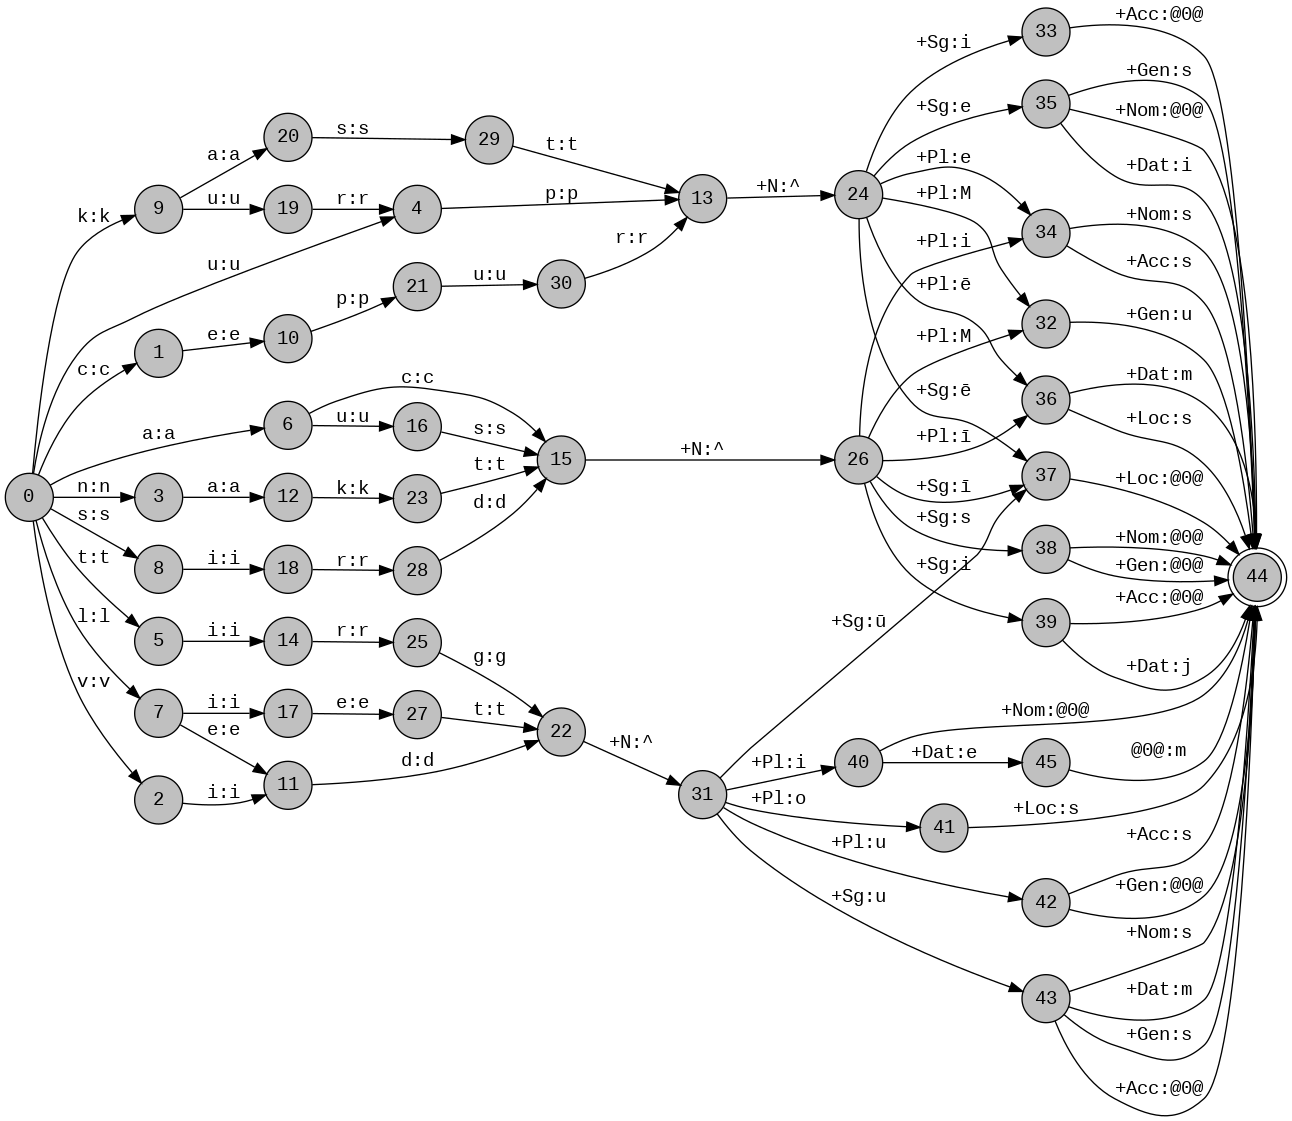

In [290]:
hfst2png(generator,'generator.png')
Image('generator.png')

In [276]:
from hfst import HfstTransducer
analyzer = HfstTransducer(generator)
print(analyzer.lookup('krēsl+N+Sg+Nom'))

()


In [277]:
analyzer.invert()
analyzer.minimize()

()


In [278]:
analyzer.invert()
analyzer.minimize()

True


In [279]:
from hfst import regex, HfstTransducer

# Iespraušana
Tiek iesprasts 'j' burts, prikš vārda "kurpju"

In [280]:
InsertJ = hfst.regex('[..] -> j || p _ "^" M')
print(InsertJ.lookup("kurp^Mu'"))

(("kurpj^Mu'", 0.0),)


#Aizvietošana

Tiek aizstāts burts 'd' ar 'ž' vārdā "siržu"

un burts 't' ar 'š' vārdā "nakšu"

In [281]:
DReplacement = hfst.regex('d -> ž ||  _ "^" M')
TReplacement = hfst.regex('t -> š ||  _ "^" M')
print(TReplacement.lookup("nakt^Mu'"))

(("nakš^Mu'", 0.0),)


#Dzēšana

Atbrīvojamies no 'M' un '^'

In [282]:
MCleanup = hfst.regex('M -> 0')
Cleanup = hfst.regex('"^" -> 0')

In [283]:
from hfst import compose
cascade = compose((generator, InsertJ, DReplacement, TReplacement, MCleanup, Cleanup))

In [284]:
cascade.remove_epsilons()

In [285]:
inv = hfst.HfstTransducer(cascade)
inv.invert()
inv.convert(hfst.ImplementationType.HFST_OL_TYPE)

In [286]:
hfst2png(cascade,'image.png')

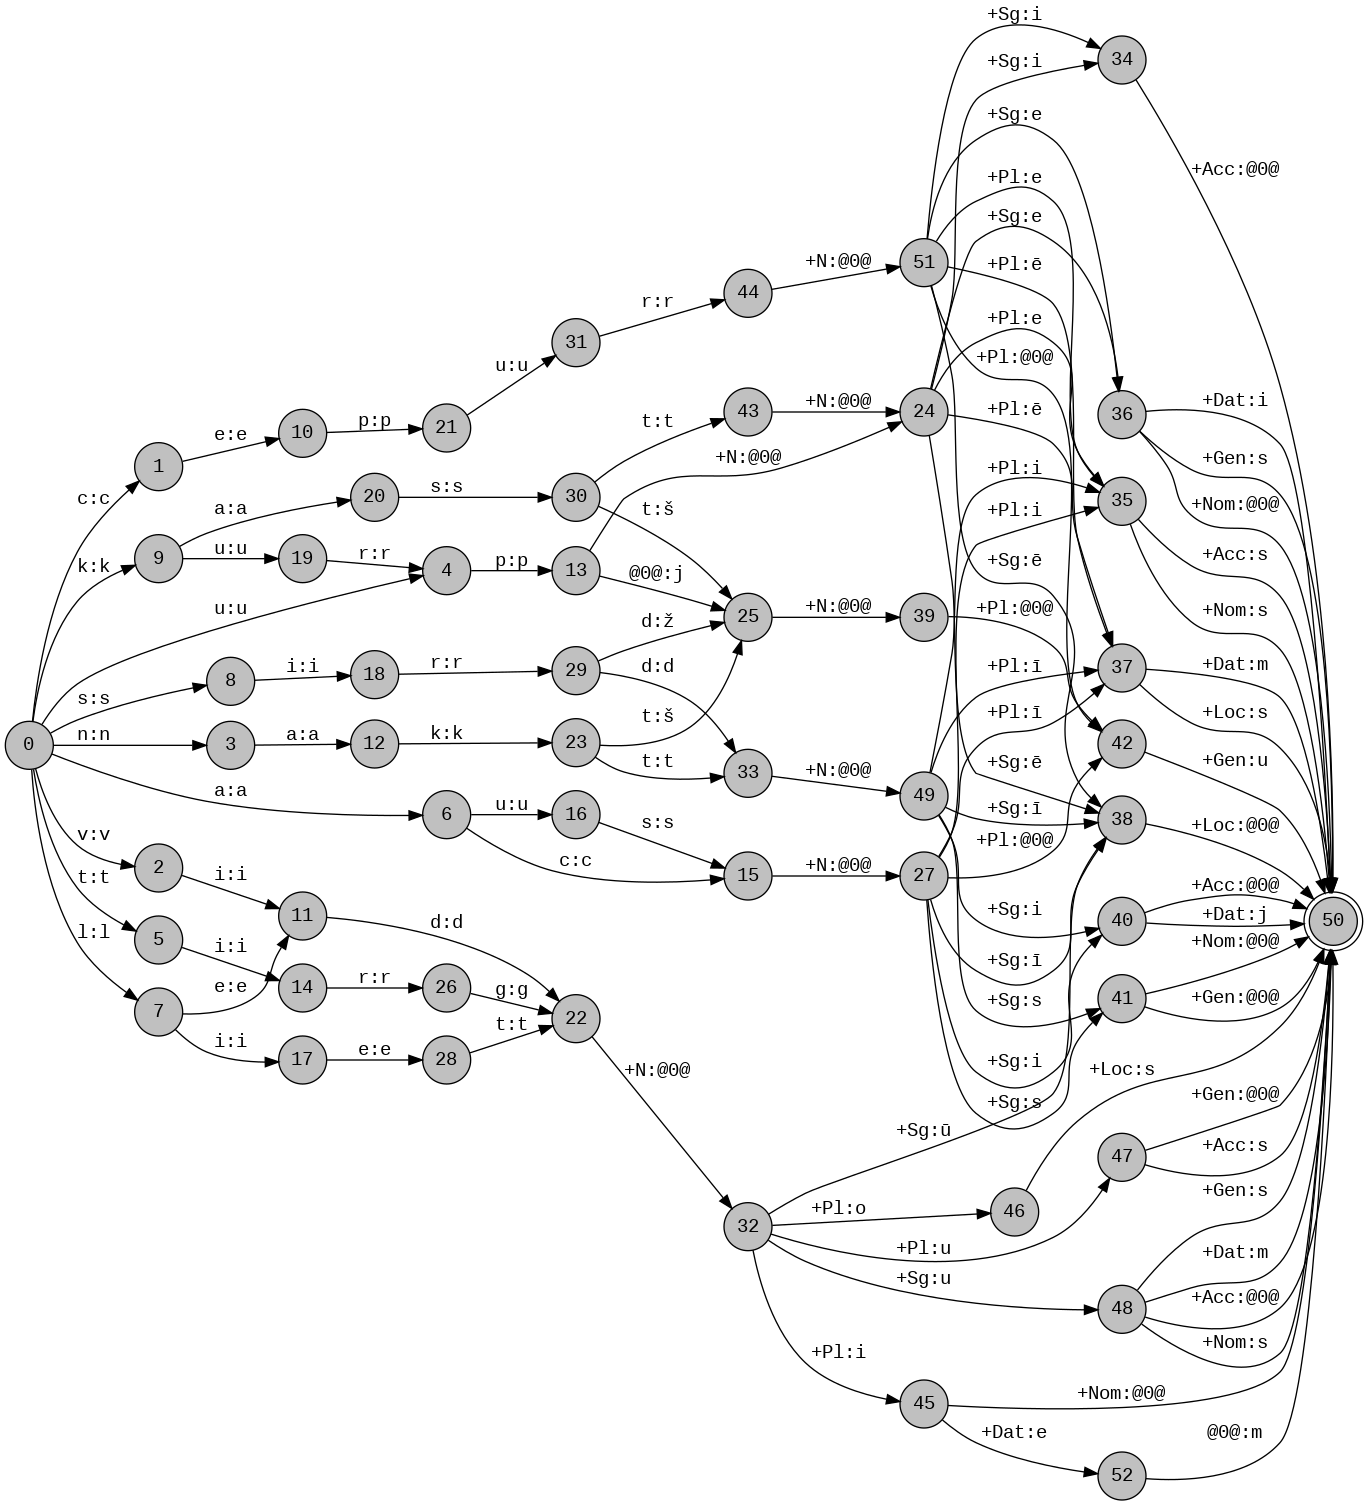

In [287]:
Image('image.png')

In [288]:
for noun in ["led", "liet", "tirg", "vid", "kast", "kurp", "cepur", "up", "sird", "nakt", "ac", "aus"]:
    for number in ["Sg", "Pl"]:
        for form in ["Nom", "Gen", "Dat", "Acc", "Loc"]:
            print(noun + "+N+" + number + "+" + form + " - " + cascade.lookup(noun + "+N+" + number + "+" + form)[0][0].replace("@_EPSILON_SYMBOL_@", ""))


led+N+Sg+Nom - ledus
led+N+Sg+Gen - ledus
led+N+Sg+Dat - ledum
led+N+Sg+Acc - ledu
led+N+Sg+Loc - ledū
led+N+Pl+Nom - ledi
led+N+Pl+Gen - ledu
led+N+Pl+Dat - lediem
led+N+Pl+Acc - ledus
led+N+Pl+Loc - ledos
liet+N+Sg+Nom - lietus
liet+N+Sg+Gen - lietus
liet+N+Sg+Dat - lietum
liet+N+Sg+Acc - lietu
liet+N+Sg+Loc - lietū
liet+N+Pl+Nom - lieti
liet+N+Pl+Gen - lietu
liet+N+Pl+Dat - lietiem
liet+N+Pl+Acc - lietus
liet+N+Pl+Loc - lietos
tirg+N+Sg+Nom - tirgus
tirg+N+Sg+Gen - tirgus
tirg+N+Sg+Dat - tirgum
tirg+N+Sg+Acc - tirgu
tirg+N+Sg+Loc - tirgū
tirg+N+Pl+Nom - tirgi
tirg+N+Pl+Gen - tirgu
tirg+N+Pl+Dat - tirgiem
tirg+N+Pl+Acc - tirgus
tirg+N+Pl+Loc - tirgos
vid+N+Sg+Nom - vidus
vid+N+Sg+Gen - vidus
vid+N+Sg+Dat - vidum
vid+N+Sg+Acc - vidu
vid+N+Sg+Loc - vidū
vid+N+Pl+Nom - vidi
vid+N+Pl+Gen - vidu
vid+N+Pl+Dat - vidiem
vid+N+Pl+Acc - vidus
vid+N+Pl+Loc - vidos
kast+N+Sg+Nom - kaste
kast+N+Sg+Gen - kastes
kast+N+Sg+Dat - kastei
kast+N+Sg+Acc - kasti
kast+N+Sg+Loc - kastē
kast+N+Pl+Nom - kast

In [268]:
import sys

def hfst2png(transducer, png_name):
    # Write the FST to a file using the att format
    f = open("a.att", "w", encoding="utf-8")
    transducer.minimize()
    transducer.write_att(f, False)

    # Convert the FST file to the dot format
    # dot format is used by graphviz library for graph visualization
    f = open("a.att", "r", encoding="utf-8")
    with open("graph.dot", "w", encoding="utf-8") as out_f:
        out_f.write('digraph G { rankdir="LR"\n')
        out_f.write('node [fontname="Tahoma",shape=circle,fontsize=14,fixedsize=true,fillcolor="grey",style=filled]\n')
        out_f.write('edge [fontname="FreeMono",fontsize=14]\n')
        for line in f.readlines():
            line = line.strip()
            row = line.split('\t')
            if len(row) >= 4:
                out_f.write('%s [label="%s"];\n' % (row[0], row[0]))
                out_f.write('%s -> %s [label="%s:%s"];\n' % (row[0], row[1], row[2], row[3]))
            elif len(row) == 1: # Final state
                out_f.write('%s [label="%s",shape=doublecircle];\n' % (row[0], row[0]))
        out_f.write('}')

    # Call graphviz dot function to generate a png file from dot file
    !dot -Tpng graph.dot > $png_name